<a href="https://colab.research.google.com/github/itsoreohi/ai/blob/main/Copy_of_TRAIN_YLC_Week_8_Homework_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 8: Supervised Learning Review**
---

### **Description**

In this week's homework, we will review everything we have seen so far this year. This is your chance to clarify any points of confusion and ultimately ensure your comfort with the fundamentals of supervised machine learning from exploratory data analysis to evaluating linear regression models.

<br>

### **Structure**

**Part 1**: [Exploratory Data Analysis](#p1)
>
> **Part 1.1**: [Exploring and Cleaning Data](#p1.1)
>
> **Part 1.2**: [Visualizing Data](#p1.2)
>
**Part 2**: [Modeling `LV ActivePower (kW)`](#p2)
>
> **Part 2.1**: [Using the Data as Is](#p2.1)
>
> **Part 2.2**: [Attempting to Improve the Model](#p2.2)
>

<br>

### **Learning Objectives**

By the end of this homework, you will:
* Understand how to perform exploratory data analysis before applying ML.
* Understand how to implement and evaluate Linear Regression models in sklearn.

<br>

### **Resources**
* [EDA with pandas Cheat Sheet](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit?usp=drive_link)

* [Data Visualization with matplotlib](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

* [Linear Regression with sklearn Updated](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=drive_link)


<br>

**Run the code below before continuing.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

<a name="p1"></a>

---
## **Part 1: Exploratory Data Analysis**
---


**Run the code cell below to create the DataFrame.**

In [ ]:
power_df = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/wind%20generator%20power/power%20-%20T1.csv.csv')

<a name="p1.1"></a>

---
### **Part 1.1: Exploratoring and Cleaning Data**
---

#### **Problem #1.1.1**

Using `.head()`, determine how many variables are included in this dataset.

In [ ]:
# COMPLETE THIS CODE

print(power_df.head())

num_rows, num_columns = power_df.shape

# Display the number of variables (columns)
print("Number of variables:", num_columns)

         Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 0:00           380.047791          5.311336   
1  01 01 2018 0:10           453.769196          5.672167   
2  01 01 2018 0:20           306.376587          5.216037   
3  01 01 2018 0:30           419.645904          5.659674   
4  01 01 2018 0:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
Number of variables: 5


#### **Problem #1.1.2**

Determine if there are any null values in this dataset and, if so, drop the rows they are in.

In [ ]:
null_values = power_df.isnull().sum()

# Display the columns with null values (if any)
print("Columns with null values:")
print(null_values[null_values > 0])

# Drop rows with null values
df_cleaned = power_df.dropna()

# Display information about the cleaned DataFrame
print("Shape of the original DataFrame:", power_df.shape)
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

Columns with null values:
LV ActivePower (kW)              1
Theoretical_Power_Curve (KWh)    1
Wind Direction (°)               1
dtype: int64
Shape of the original DataFrame: (50536, 5)
Shape of the cleaned DataFrame: (50533, 5)


#### **Problem #1.1.3**

Determine if there are any duplicate values in this dataset and, if so, drop the rows they are in.

In [ ]:
duplicates = power_df[power_df.duplicated()]

# Display information about duplicate rows (if any)
print("Duplicate rows:")
print(duplicates)

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display information about the cleaned DataFrame
print("Shape of the original DataFrame:", power_df.shape)
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

Duplicate rows:
            Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
189   02 01 2018 7:10          2807.613037         10.674470   
229  02 01 2018 13:40          3273.656006         11.325810   
326   03 01 2018 5:40           646.924500          6.301719   

     Theoretical_Power_Curve (KWh)  Wind Direction (°)  
189                    3144.977295          197.229706  
229                    3375.742901          201.144608  
326                     730.590171          168.811996  
Shape of the original DataFrame: (50536, 5)
Shape of the cleaned DataFrame: (50530, 5)


#### **Problem #1.1.4**

It is not possible in this case for the power generated to be negative. Check if there are any entries where `LV ActivePower (kW)` is negative and, if so, drop the rows they are in.

In [ ]:
negative_power_rows = power_df[power_df['LV ActivePower (kW)'] < 0]

# Display information about rows with negative power values (if any)
print("Rows with negative power values:")
print(negative_power_rows)

# Drop rows where LV ActivePower (kW) is negative
df_cleaned = df_cleaned[df_cleaned['LV ActivePower (kW)'] >= 0]

# Display information about the cleaned DataFrame
print("Shape of the original DataFrame:", power_df.shape)
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

Rows with negative power values:
              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
388    03 01 2018 16:00            -0.393068          2.185888   
800    06 01 2018 15:50            -0.456533          2.949518   
1408   10 01 2018 21:10            -0.038067          3.248698   
1590    12 01 2018 3:40            -0.331467          2.574092   
1595    12 01 2018 4:30            -0.959000          3.333948   
2098   15 01 2018 16:20            -0.269599          2.636617   
3021   22 01 2018 02:10            -0.099067          3.047134   
3783   31 01 2018 17:20            -0.488667          2.690104   
4604   06 02 2018 10:10            -0.581134          2.702901   
5083   09 02 2018 18:00            -0.020600          2.673189   
5186   10 02 2018 11:10            -0.133334          2.688831   
5416    12 02 2018 1:30            -0.077133          2.749635   
5580   13 02 2018 04:50            -0.718266          3.179412   
6264   17 02 2018 22:50            -0.58119

#### **Problem #1.1.5**

After potentially dropping rows above, determine how many data points remain in the dataset.

In [ ]:
print("Shape of the cleaned DataFrame:", power_df.shape)

# Get the number of rows in the cleaned DataFrame
num_data_points = df_cleaned.shape[0]

# Display the number of data points remaining
print("Number of data points remaining:", num_data_points)

Shape of the cleaned DataFrame: (50536, 5)
Number of data points remaining: 50473


#### **Problem #1.1.6**

Using pandas methods, determine the following statistics about this dataset:
* Average of each variable.
* Minimum of each variable.
* Maximum of each variable.
* Standard Deviation of each variable.

In [ ]:
statistics = power_df.describe()

# Transpose the result for better readability
statistics = statistics.transpose()

# Display the statistics
print("Statistics about each variable:")
print(statistics[['mean', 'min', 'max', 'std']])


Statistics about each variable:
                                      mean       min          max          std
LV ActivePower (kW)            1307.705285 -2.471405  3618.732910  1312.456703
Wind Speed (m/s)                  7.557970  0.000000    25.206011     4.227011
Theoretical_Power_Curve (KWh)  1492.214385  0.000000  3600.000000  1368.003969
Wind Direction (°)              123.695288  0.000000   359.997589    93.442549


#### **Problem #1.1.7**

To finish our initial data exploration, let's look at the `Date/Time` variable. Specifically,

1. Look at the first 10 rows of this variable and determine the relationship between this variable and `power_df.index`.
1. Determine how many data points fit into one day.
1. Determine how many days are contained in this dataset.

##### **1. Look at the first 10 rows of this variable and determine the relationship between this variable and `power_df.index`.**

In [ ]:
date_time_variable = 'Date/Time'

# Display the first 10 rows of the date/time variable and its relationship with the index
print("First 10 rows of", date_time_variable, "and its relationship with the index:")
print(power_df.loc[:, [date_time_variable]].head(10))

First 10 rows of Date/Time and its relationship with the index:
         Date/Time
0  01 01 2018 0:00
1  01 01 2018 0:10
2  01 01 2018 0:20
3  01 01 2018 0:30
4  01 01 2018 0:40
5  01 01 2018 0:50
6  01 01 2018 1:00
7  01 01 2018 1:10
8  01 01 2018 1:20
9  01 01 2018 1:30


##### **2. Determine how many data points fit into one day.**

Specifically, find the value for `day_len` such that the code below prints out up to `02 01 2018 0:00` at the end.

In [ ]:
date_time_variable = 'Date/Time'

# Assuming the date/time values are in datetime format
power_df[date_time_variable] = pd.to_datetime(power_df[date_time_variable])

# Find the index of the last timestamp for a particular day (e.g., '02 01 2018 0:00')
end_date = pd.to_datetime('02 01 2018 00:00')
day_len = power_df[power_df[date_time_variable] == end_date].index.max()-1
print(day_len)
# Use day_len in your code
print(power_df[date_time_variable].iloc[0:day_len+1])

144
0     2018-01-01 00:00:00
1     2018-01-01 00:10:00
2     2018-01-01 00:20:00
3     2018-01-01 00:30:00
4     2018-01-01 00:40:00
              ...        
140   2018-01-01 23:10:00
141   2018-01-01 23:20:00
142   2018-01-01 23:30:00
143   2018-01-01 23:40:00
144   2018-01-01 23:50:00
Name: Date/Time, Length: 145, dtype: datetime64[ns]


##### **3. Determine how many days are contained in this dataset.**


**Hint**: Use the variable you created above, `day_len`. Be careful about how you approach this though! If you dropped any null values, there may be missing times.

In [ ]:
missing_times = power_df[date_time_variable].isnull().sum()

# Calculate the number of days in the dataset
num_days = (power_df.shape[0] - missing_times) // (day_len + 1)

# Display the number of days in the dataset
print("Number of days in the dataset:", num_days)

Number of days in the dataset: 348


<a name="p1.2"></a>

---
### **Part 1.2: Visualizing Data**
---

Make sure you include proper labels and consider adjusting the figure size, color, and other aspects of the visuals to make them as clear as possible.

#### **Problem #1.2.1**

Plot `LV ActivePower (kW)` over time, using `power_df.index` as the x axis representing time.

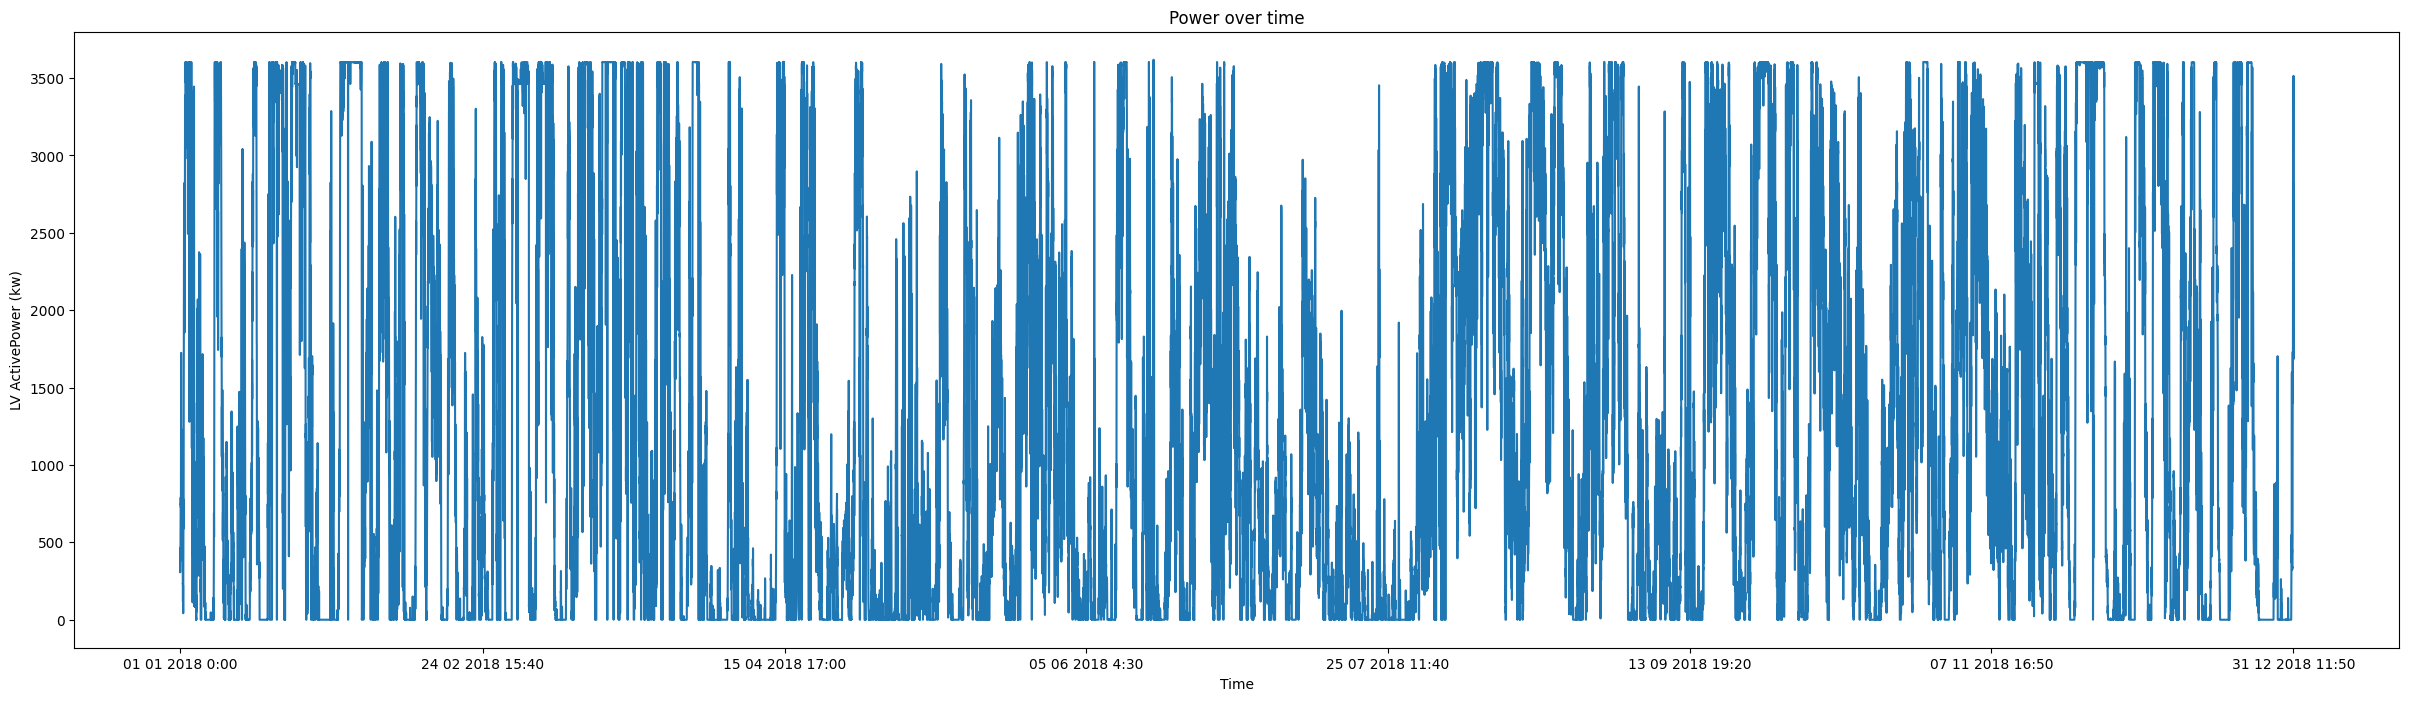

In [ ]:
date_time_variable = 'Date/Time'

# Assuming 'LV ActivePower (kW)' is the variable of interest
power_variable = 'LV ActivePower (kW)'

#start and end points
start = df_cleaned[date_time_variable].index.min()
end = df_cleaned[date_time_variable].index.max()

#x and y values
x = df_cleaned[start:end][date_time_variable]
y = df_cleaned[start:end][power_variable]
#x ticks, reduce number of x ticks
x_ticks = df_cleaned[start:end+1:(day_len)*50]

#plot
plt.figure(figsize = (30, 8))
plt.plot(x,y)
#set x_ticks
plt.xticks(x_ticks.index, x_ticks[date_time_variable])

#set axis labels
plt.xlabel("Time")
plt.ylabel("LV ActivePower (kw)")
plt.title("Power over time")

plt.show()

#### **Problem #1.2.2**

The plot above contains a *lot* of data and it can be hard to really see any patterns in it. In the space below, create the same plot, but only for the first day's worth of data. **NOTE**: Do not worry about missing/dropped rows, simply use a full 24 hours worth of data.

<br>

**Hint**: Use the `day_len` variable you created in the section above.

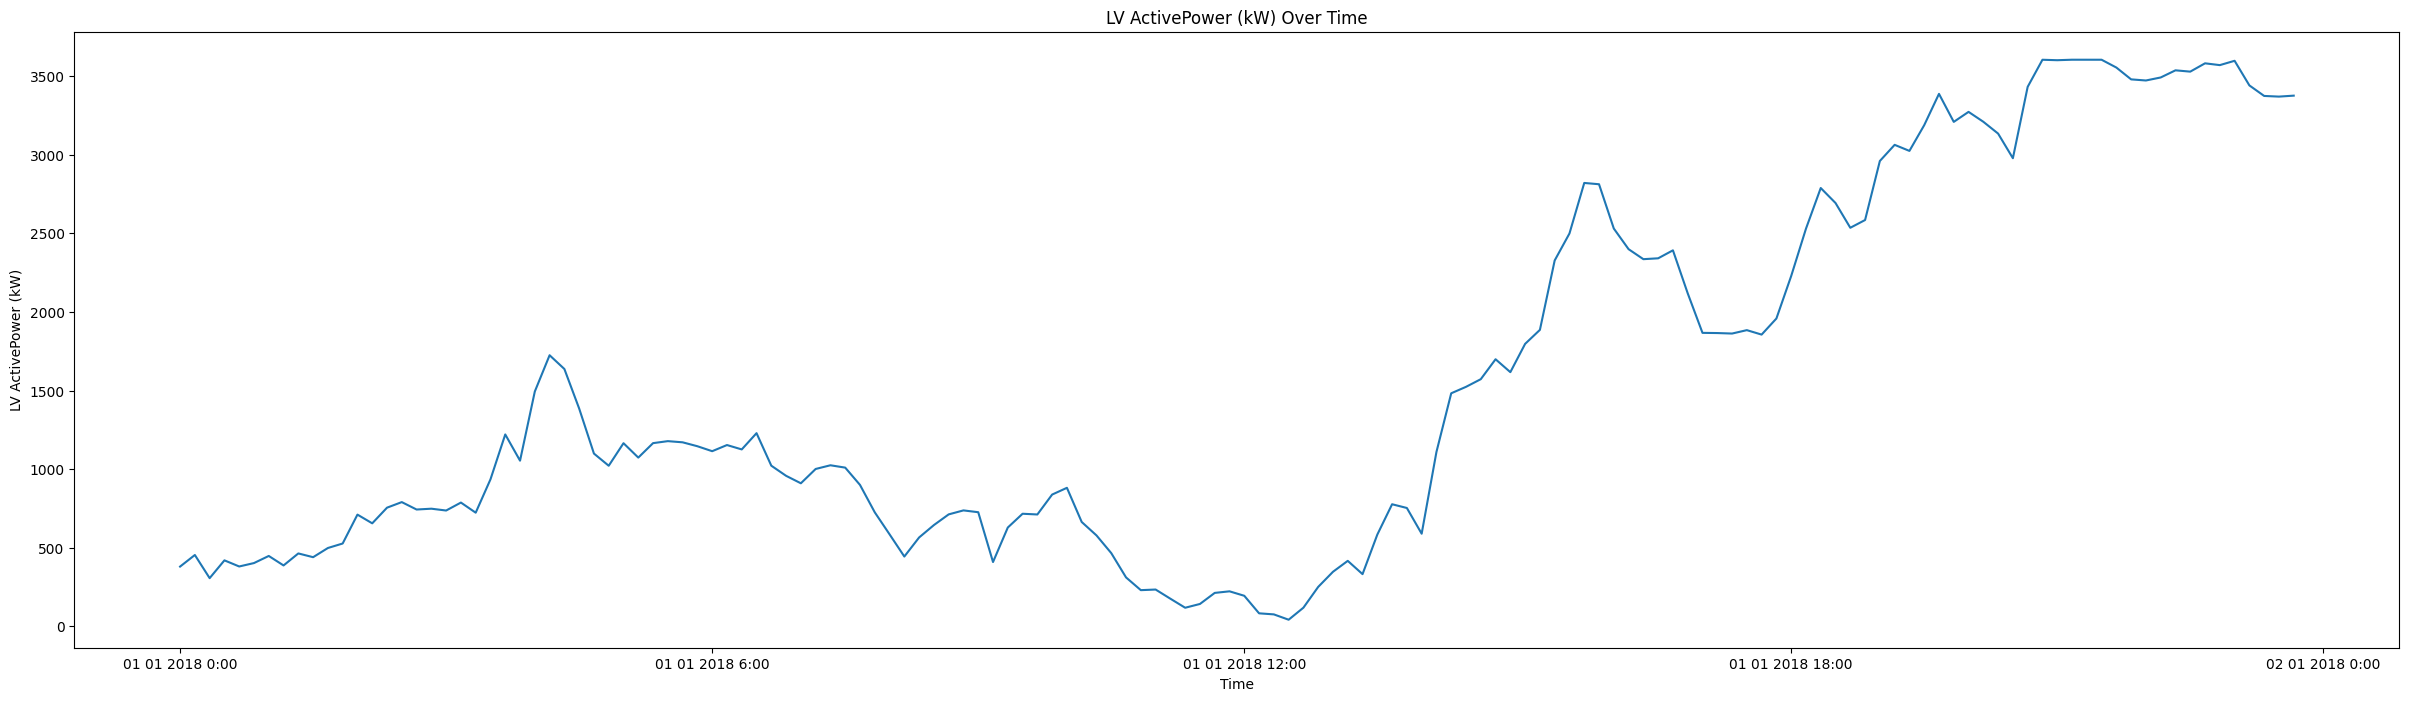

In [ ]:
# Plotting the data
#start and end times
start = 0
end = day_len

#x and y values
x = df_cleaned[start:end][date_time_variable]
y = df_cleaned[start:end][power_variable]
#x ticks, reduce number of x ticks
x_ticks = df_cleaned[start:end+1:(day_len)//4]

#plot
plt.figure(figsize=(30, 8))
plt.plot(x, y)
#set x_ticks
plt.xticks(x_ticks.index, x_ticks[date_time_variable])

#set axis labels
plt.xlabel('Time')
plt.ylabel('LV ActivePower (kW)')
plt.title('LV ActivePower (kW) Over Time')

plt.show()

#### **Problem #1.2.3**

Create a similar plot, but for the first *week's* worth of data. **NOTE**: Do not worry about missing/dropped rows, simply use a full 7 days worth of data.

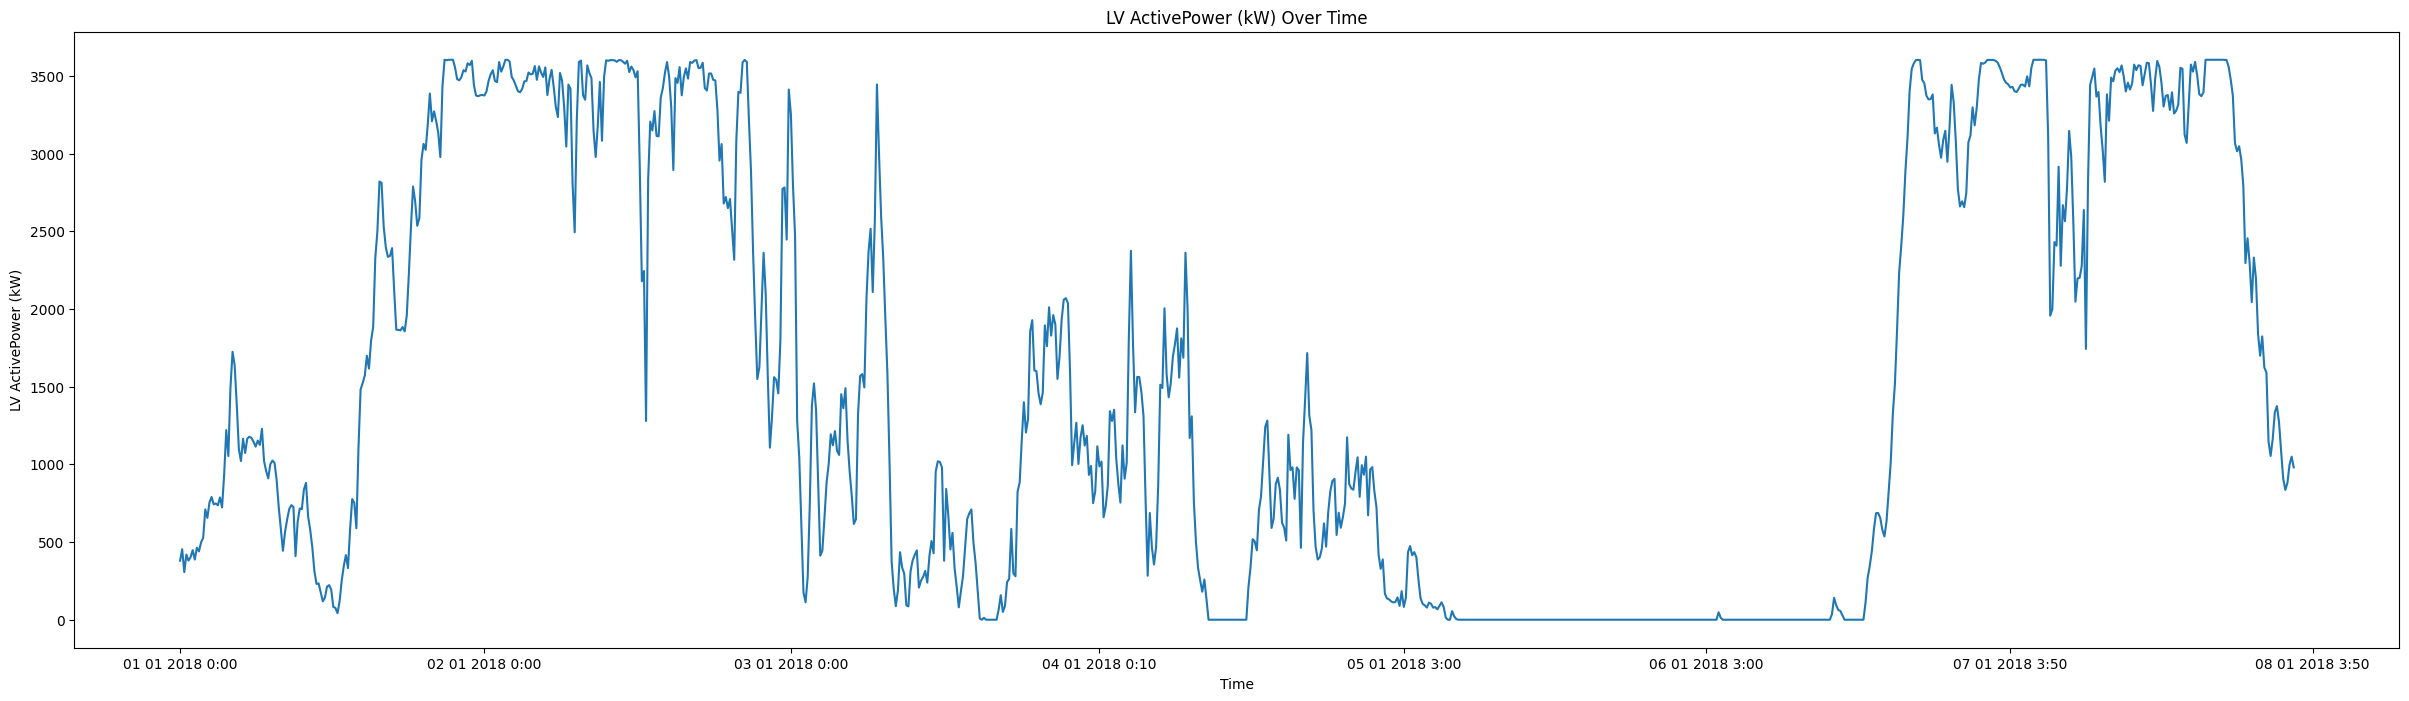

In [ ]:
# Plotting the data
#start and end times
start = 0
end = day_len*7

#x and y values
x = df_cleaned[start:end][date_time_variable]
y = df_cleaned[start:end][power_variable]
#x ticks, reduce number of x ticks
x_ticks = df_cleaned[start:end+1:(day_len)]

#plot
plt.figure(figsize=(30, 8))
plt.plot(x, y)
#set x_ticks
plt.xticks(x_ticks.index, x_ticks[date_time_variable])

#set axis labels
plt.xlabel('Time')
plt.ylabel('LV ActivePower (kW)')
plt.title('LV ActivePower (kW) Over Time')

plt.show()

#### **[OPTIONAL] Problem #1.2.4**

Read about the [matplotlib.pyplot.axvline(...) method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) and use it to create a vertical line on this plot at the beginning of each day.

<br>

**NOTE**: We recommend that you skip this problem for now and come back later if you're curious.

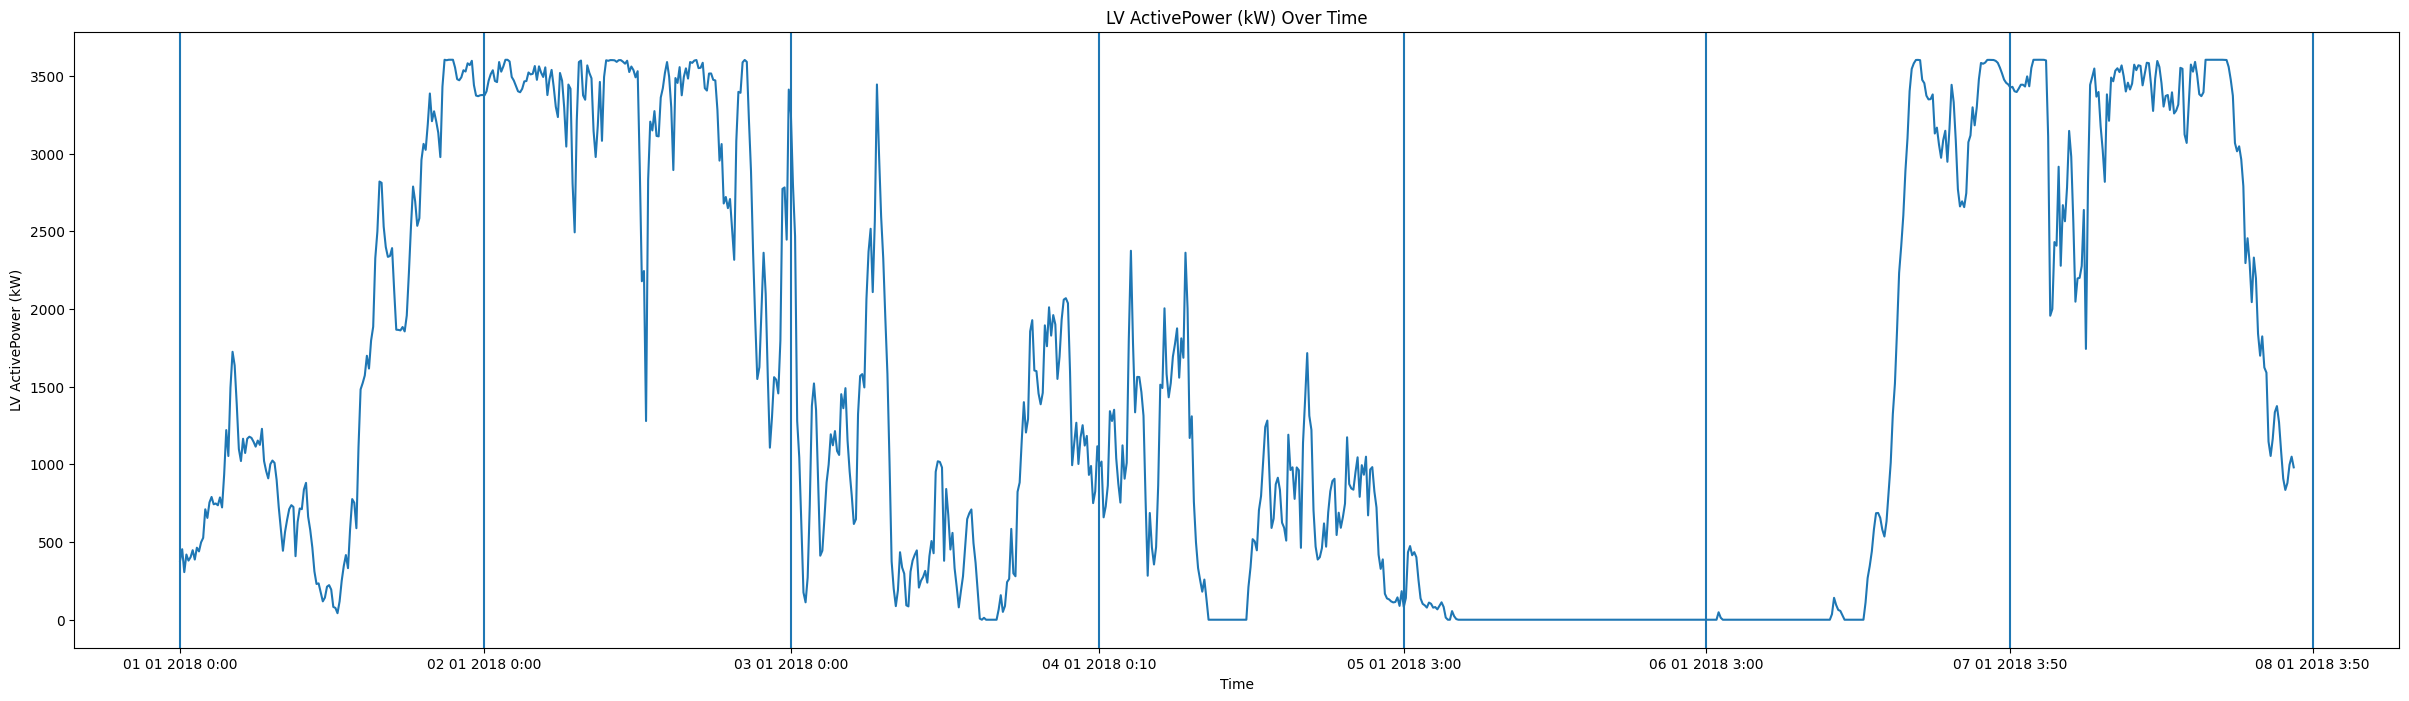

In [ ]:
# Plotting the data
#start and end times
start = 0
end = day_len*7

#x and y values
x = df_cleaned[start:end][date_time_variable]
y = df_cleaned[start:end][power_variable]
#x ticks, reduce number of x ticks
x_ticks = df_cleaned[start:end+1:(day_len)]

#plot
plt.figure(figsize=(30, 8))
plt.plot(x, y)
#set x_ticks
plt.xticks(x_ticks.index, x_ticks[date_time_variable])
#add line every length of day for each day (8 times)
for i in range(8):
  plt.axvline(x_ticks.index[i])

#set axis labels
plt.xlabel('Time')
plt.ylabel('LV ActivePower (kW)')
plt.title('LV ActivePower (kW) Over Time')

plt.show()

#### **Problem #1.2.5**

Create a similar plot, but for the first week's worth of `Wind Speed (m/s)` data on the y axis.

<br>

**NOTE**: You *do not* need to include vertical lines.

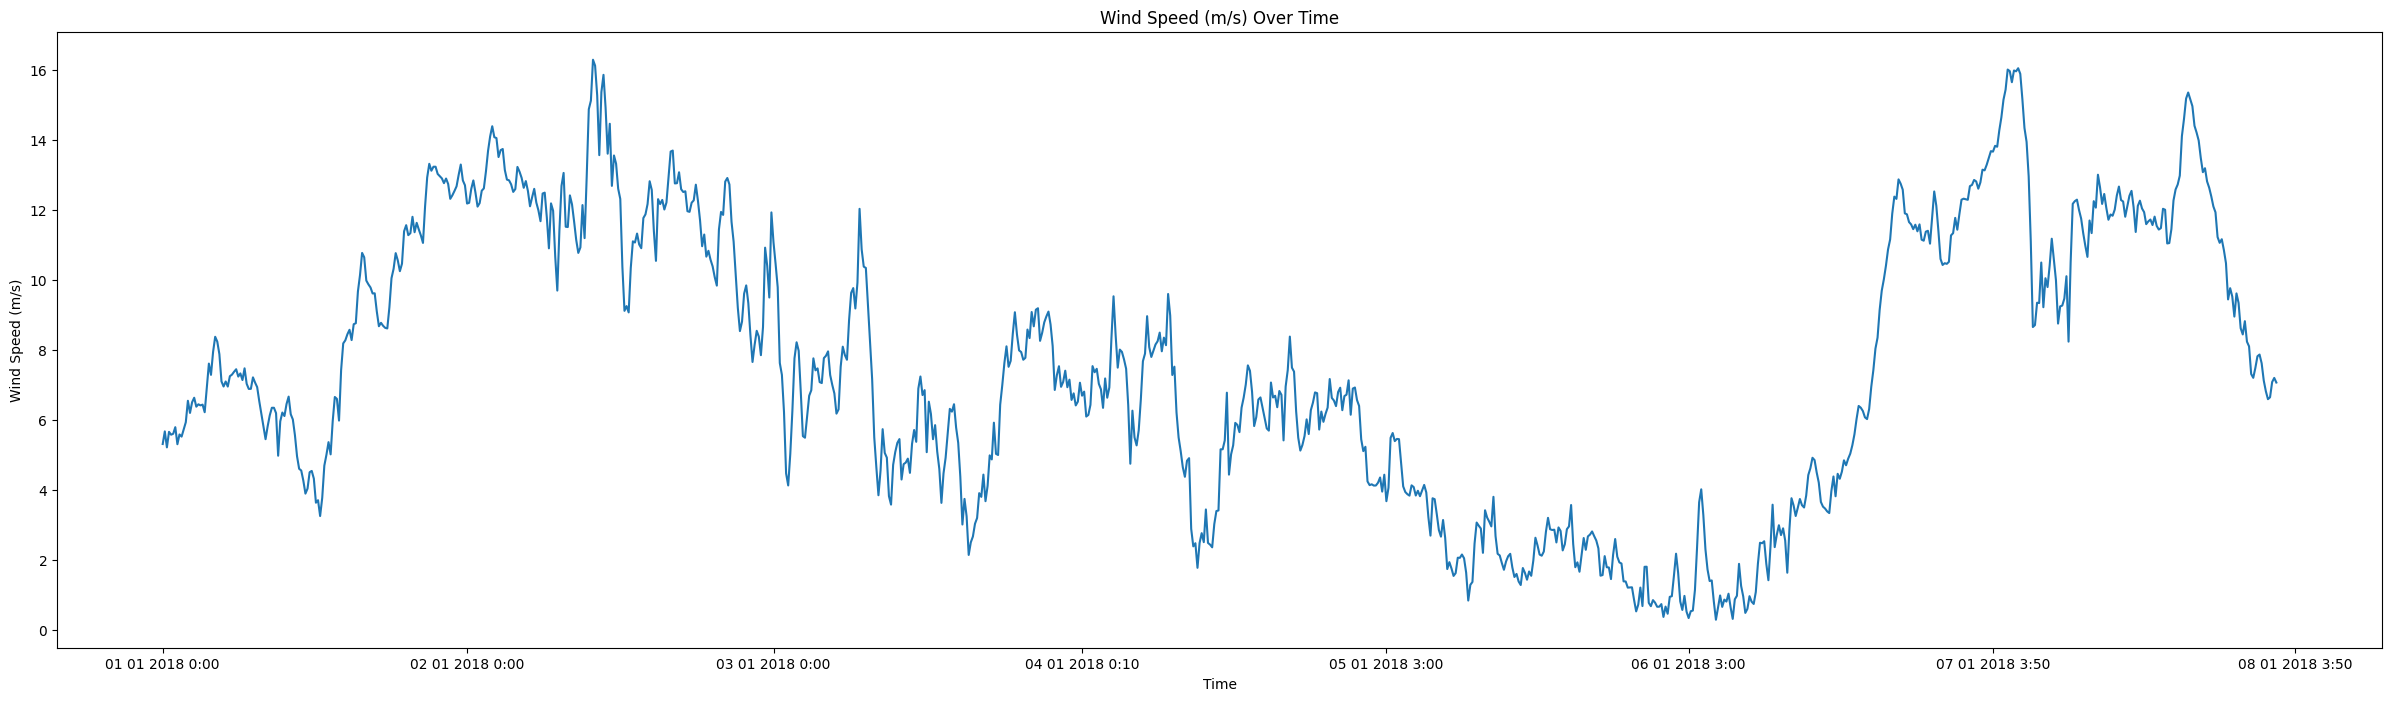

In [ ]:
# Plotting the data
# Assuming 'Wind Speed (m/s)' is the variable of interest
wind_speed_variable = "Wind Speed (m/s)"
#start and end times
start = 0
end = day_len*7

#x and y values
x = df_cleaned[start:end][date_time_variable]
y = df_cleaned[start:end][wind_speed_variable]
#x ticks, reduce number of x ticks
x_ticks = df_cleaned[start:end+1:(day_len)]

#plot
plt.figure(figsize=(30, 8))
plt.plot(x, y)
#set x_ticks
plt.xticks(x_ticks.index, x_ticks[date_time_variable])

#set axis labels
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed (m/s) Over Time')

plt.show()

#### **Problem #1.2.6**

Create a similar plot, but for the first week's worth of `Wind Direction (°)` data on the y axis.

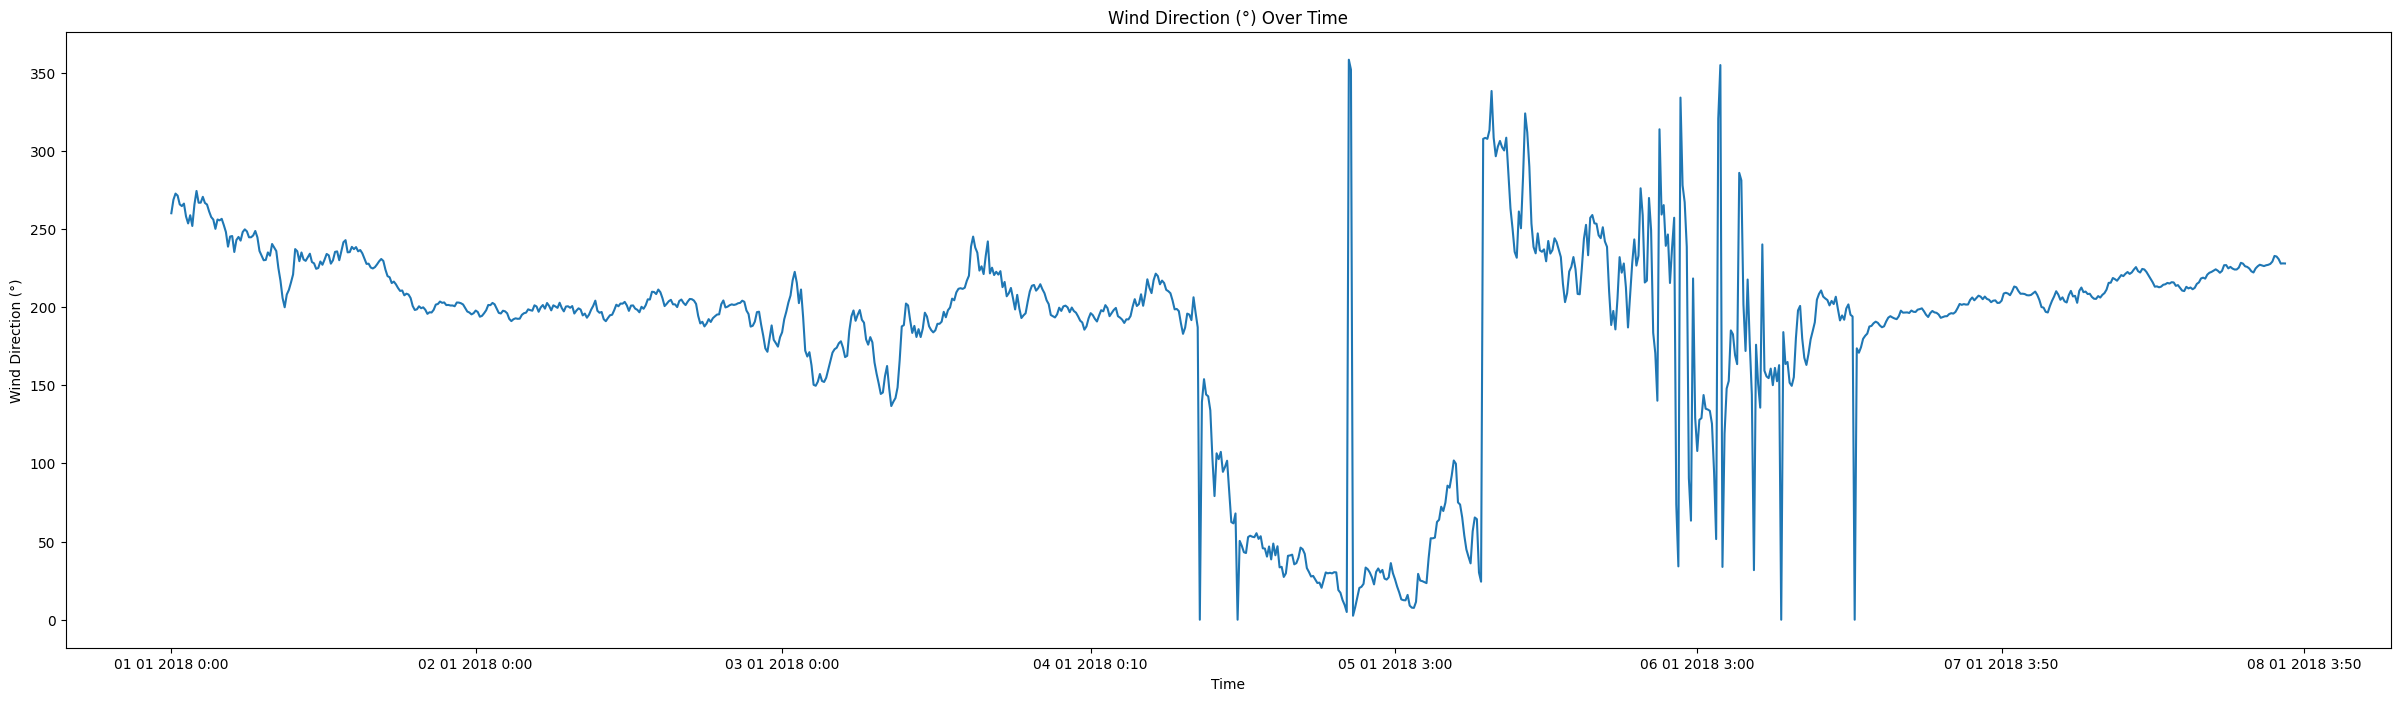

In [ ]:
# Plotting the data
# Assuming 'Wind Direction (°)' is the variable of interest
wind_dir_variable = "Wind Direction (°)"
#start and end times
start = 0
end = day_len*7

#x and y values
x = df_cleaned[start:end][date_time_variable]
y = df_cleaned[start:end][wind_dir_variable]
#x ticks, reduce number of x ticks
x_ticks = df_cleaned[start:end+1:(day_len)]

#plot
plt.figure(figsize=(30, 8))
plt.plot(x, y)
#set x_ticks
plt.xticks(x_ticks.index, x_ticks[date_time_variable])

#set axis labels
plt.xlabel('Time')
plt.ylabel('Wind Direction (°)')
plt.title('Wind Direction (°) Over Time')

plt.show()

#### **Problem #1.2.7**

Now, create a plot to see the relationship between `LV ActivePower (kW)` and `Wind Speed (m/s)`.

<br>

**NOTE**: We will be using `LV ActivePower (kW)` as our label, so it is natural (but not strictly required) to use this as the y variable.

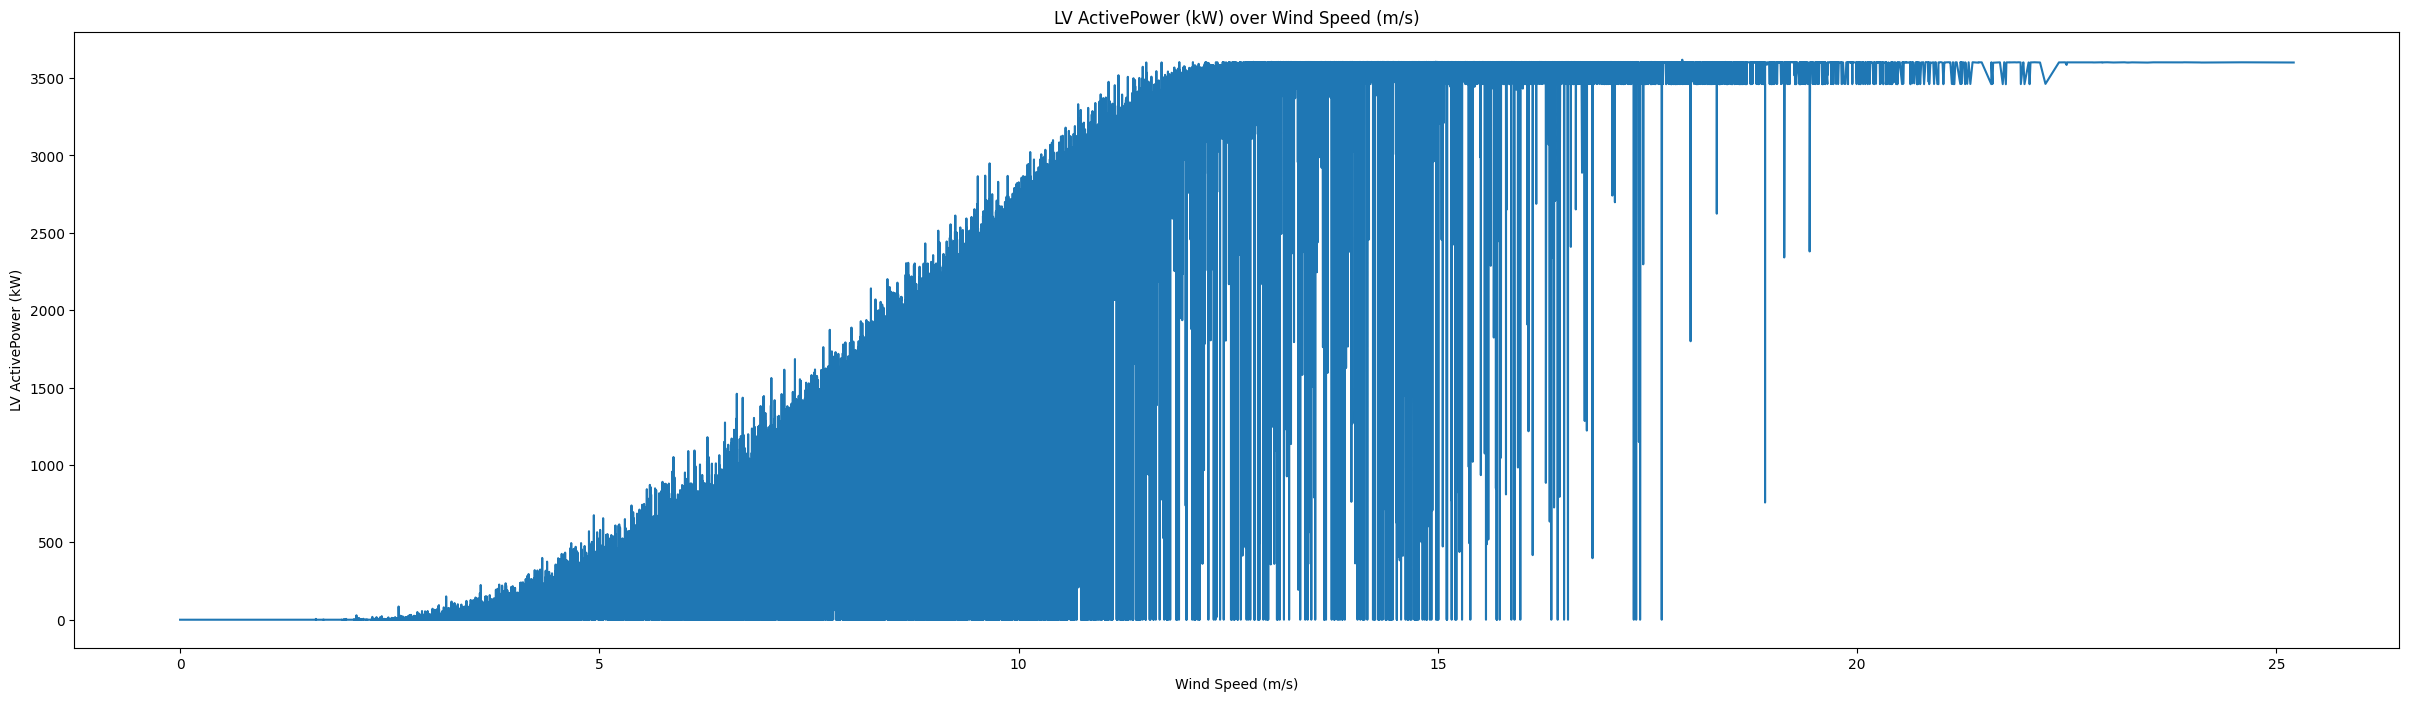

In [ ]:
# Plotting the data
#sort graph by wind speed as it is the x-axis
wind_df = df_cleaned.sort_values(by=[wind_speed_variable])
#start and end indices
start = 0
end = wind_df.index.max()

#x and y values
x = wind_df[start:end][wind_speed_variable]
y = wind_df[start:end][power_variable]
#x ticks, reduce number of x ticks
#x_ticks = df_cleaned[start:end+1:(day_len)]

#plot
plt.figure(figsize=(30, 8))
plt.plot(x, y)
#set x_ticks
#plt.xticks(x_ticks.index, x_ticks[date_time_variable])

#set axis labels
plt.xlabel(wind_speed_variable)
plt.ylabel(power_variable)
plt.title(power_variable + " over " + wind_speed_variable)

plt.show()

#### **Problem #1.2.8**

Create a plot to see the relationship between `LV ActivePower (kW)` and `Wind Direction (°)`.

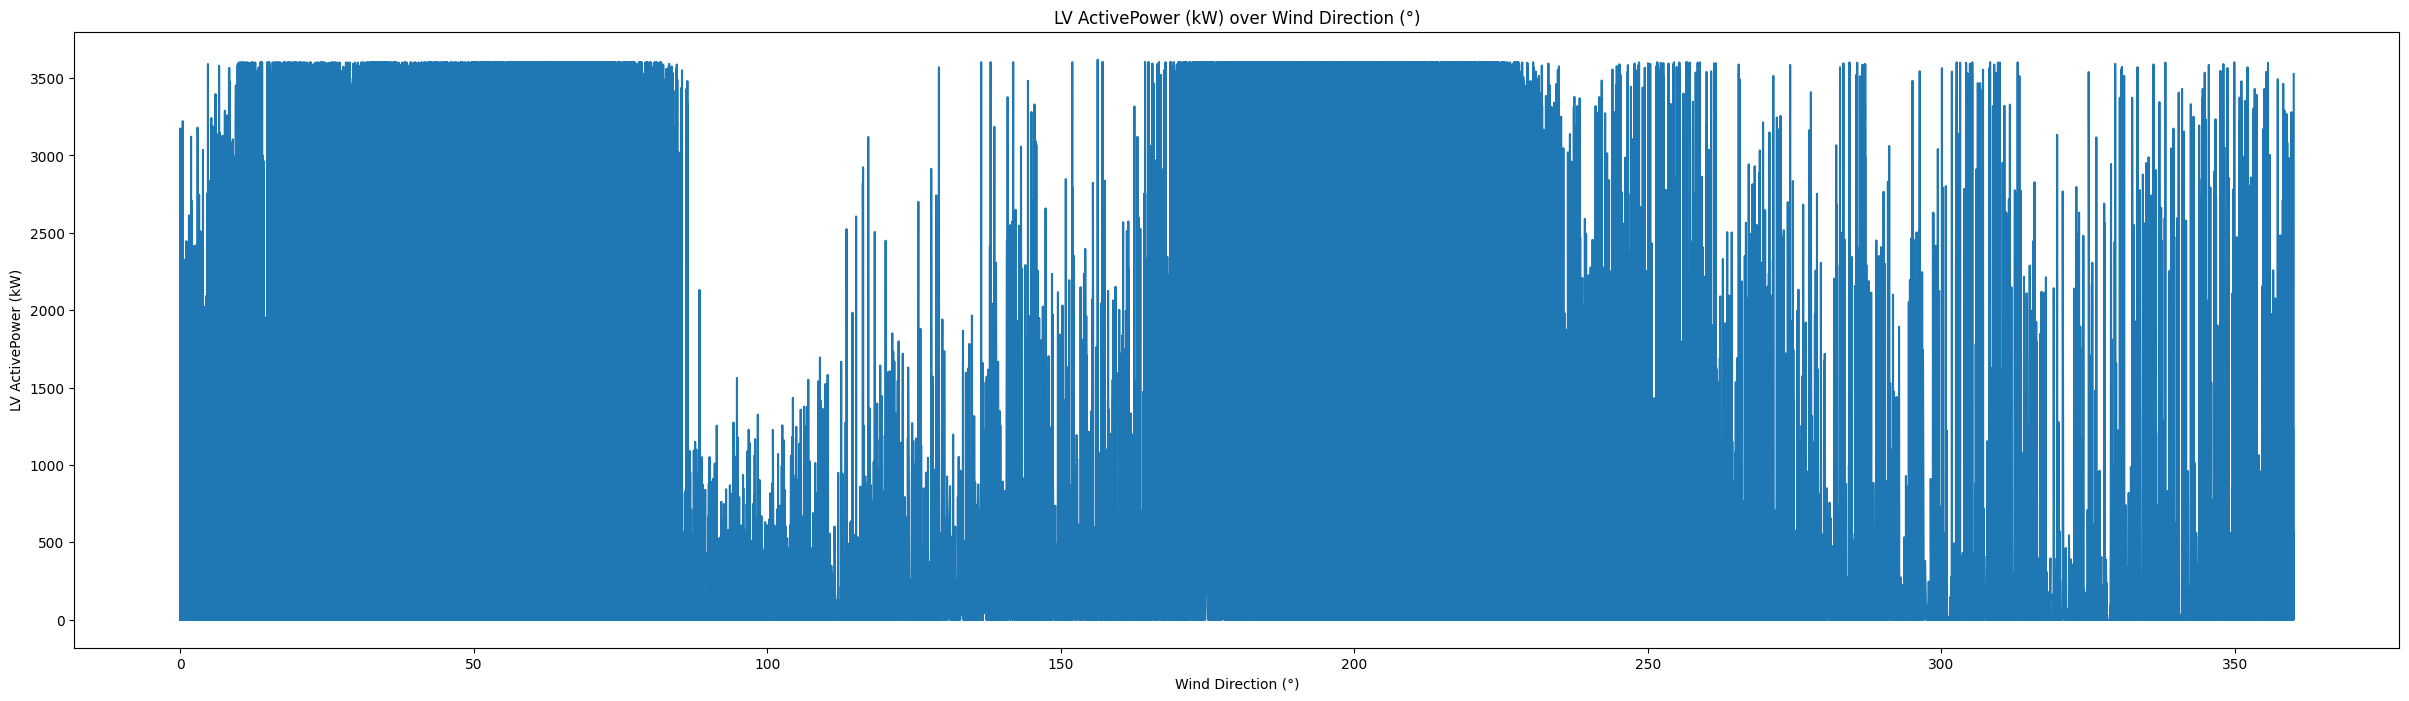

In [ ]:
# Plotting the data
#sort graph by wind dir as it is the x-axis
wind__dir_df = df_cleaned.sort_values(by=[wind_dir_variable])
#start and end indices
start = 0
end = wind__dir_df.index.max()

#x and y values
x = wind__dir_df[start:end][wind_dir_variable]
y = wind__dir_df[start:end][power_variable]
#x ticks, reduce number of x ticks
#x_ticks = df_cleaned[start:end+1:(day_len)]

#plot
plt.figure(figsize=(30, 8))
plt.plot(x, y)
#set x_ticks
#plt.xticks(x_ticks.index, x_ticks[date_time_variable])

#set axis labels
plt.xlabel(wind_dir_variable)
plt.ylabel(power_variable)
plt.title(power_variable + " over " + wind_dir_variable)

plt.show()

#### **Problem #1.2.9**

Create a plot to see the relationship between `LV ActivePower (kW)` and `Theoretical_Power_Curve (KWh)`.

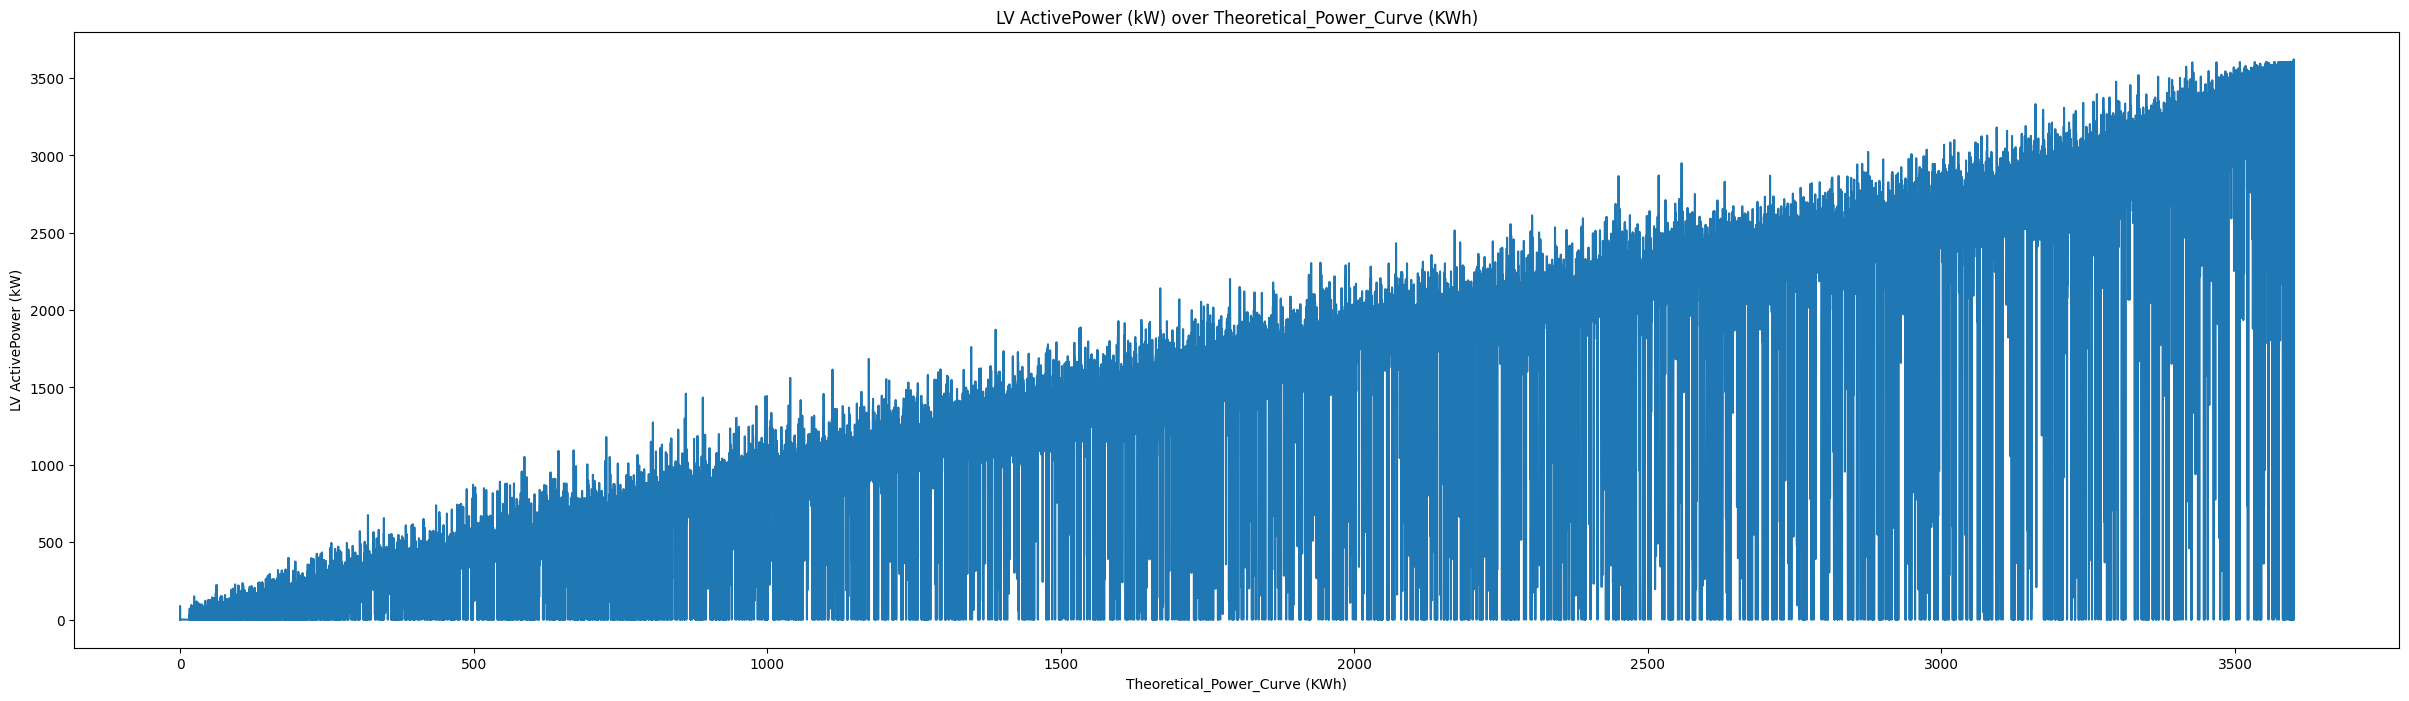

In [ ]:
# Plotting the data
#assuming target variable is 'Theoretical_Power_Curve (KWh)'
theoretical_power_variable = "Theoretical_Power_Curve (KWh)"
#sort graph by theoretical power as it is the x-axis
theoretical_power_df = df_cleaned.sort_values(by=[theoretical_power_variable])
#start and end indices
start = 0
end = wind__dir_df.index.max()

#x and y values
x = theoretical_power_df[start:end][theoretical_power_variable]
y = theoretical_power_df[start:end][power_variable]
#x ticks, reduce number of x ticks
#x_ticks = df_cleaned[start:end+1:(day_len)]

#plot
plt.figure(figsize=(30, 8))
plt.plot(x, y)
#set x_ticks
#plt.xticks(x_ticks.index, x_ticks[date_time_variable])

#set axis labels
plt.xlabel(theoretical_power_variable)
plt.ylabel(power_variable)
plt.title(power_variable + " over " + theoretical_power_variable)

plt.show()

#### **Problem #1.2.10**

It's common that during data visualization, certain aspects of the data will become clear that warrant further modification of the data. In this particular case, these plots have highlighted several aspects of the data that we should consider in our modeling:

1. When `LV ActivePower (kW)` is 0, the other variables can take on a very wide range of values. This is *likely* a sign that we cannot trust the data when `LV ActivePower (kW)` is 0 since it seems to have very little relationship to the other variables, which is not particularly realistic. **NOTE**: This is can be seen by a straight horizontal line of data running along the bottom of the x axis.

2. Similarly, when `Theoretical_Power_Curve (KWh)` is at its maximum, the other variables can take on a wide range of values. **NOTE**: This can be seen by a straight vertical line of data running along the right side of the graph with `Theoretical_Power_Curve (KWh)`.


<br>

Complete the code below to verify the two patterns described above and that this *doesn't* occur for the other variables. **NOTE**: We have provided you the code for `LV ActivePower (kW)` to get you started.

##### **`LV ActivePower (kW)`**

In [ ]:
rows_to_examine = power_df['LV ActivePower (kW)'] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,10781.0,10781.000000,10781.000000,10781.000000
mean,0.0,3.121525,257.199356,153.527840
std,0.0,2.472904,729.154681,111.094082
min,0.0,0.000000,0.000000,0.000000
25%,0.0,1.738193,0.000000,51.330460
50%,0.0,2.475772,0.000000,125.123703
75%,0.0,3.270413,30.503065,253.854904
max,0.0,17.669189,3600.000000,359.987396


In [ ]:
rows_to_examine = power_df['LV ActivePower (kW)'] == power_df['LV ActivePower (kW)'].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,1.00000,1.00000,1.0,1.000000
mean,3618.73291,17.91428,3600.0,156.281097
std,NaN,NaN,NaN,NaN
min,3618.73291,17.91428,3600.0,156.281097
25%,3618.73291,17.91428,3600.0,156.281097
50%,3618.73291,17.91428,3600.0,156.281097
75%,3618.73291,17.91428,3600.0,156.281097
max,3618.73291,17.91428,3600.0,156.281097


##### **`Theoretical_Power_Curve (KWh)`**

In [ ]:
rows_to_examine = power_df[theoretical_power_variable] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,7749.000000,7749.000000,7749.0,7749.000000
mean,0.479746,1.977638,0.0,167.503268
std,3.074544,0.682158,0.0,110.914348
min,-1.077131,0.000000,0.0,0.000000
25%,0.000000,1.481596,0.0,64.137253
50%,0.000000,2.076653,0.0,158.412399
75%,0.000000,2.551724,0.0,268.143890
max,85.393623,2.999583,0.0,359.987396


In [ ]:
rows_to_examine = power_df[theoretical_power_variable] == power_df[theoretical_power_variable].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,5454.000000,5454.000000,5454.0,5454.000000
mean,3450.001670,15.682668,3600.0,148.673418
std,591.480388,2.258319,0.0,72.649248
min,0.000000,13.000690,3600.0,0.000000
25%,3538.521240,13.819595,3600.0,66.625858
50%,3600.296020,15.053465,3600.0,188.997551
75%,3602.609802,17.118750,3600.0,201.193077
max,3618.732910,25.206011,3600.0,357.279205


##### **`Wind Speed (m/s)`**

In [ ]:
rows_to_examine = power_df[wind_speed_variable] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,10.0,10.0,10.0,10.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0


In [ ]:
rows_to_examine = power_df[wind_speed_variable] == power_df[wind_speed_variable].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,1.000000,1.000000,1.0,1.0000
mean,3600.780029,25.206011,3600.0,202.9702
std,NaN,NaN,NaN,NaN
min,3600.780029,25.206011,3600.0,202.9702
25%,3600.780029,25.206011,3600.0,202.9702
50%,3600.780029,25.206011,3600.0,202.9702
75%,3600.780029,25.206011,3600.0,202.9702
max,3600.780029,25.206011,3600.0,202.9702


##### **`Wind Direction (°)`**

In [ ]:
rows_to_examine = power_df[wind_dir_variable] == 0

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,75.000000,75.000000,75.000000,75.0
mean,1.179799,4.858350,768.584730,0.0
std,7.662038,3.780623,1079.261911,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.739762,0.000000,0.0
50%,0.000000,4.436895,208.760611,0.0
75%,0.000000,7.552580,1285.365695,0.0
max,60.581200,17.411289,3600.000000,0.0


In [ ]:
rows_to_examine = power_df[wind_dir_variable] == power_df[wind_dir_variable].max()

power_df[rows_to_examine].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,1.000000,1.00000,1.00000,1.000000
mean,3526.177002,12.44361,3574.67271,359.997589
std,NaN,NaN,NaN,NaN
min,3526.177002,12.44361,3574.67271,359.997589
25%,3526.177002,12.44361,3574.67271,359.997589
50%,3526.177002,12.44361,3574.67271,359.997589
75%,3526.177002,12.44361,3574.67271,359.997589
max,3526.177002,12.44361,3574.67271,359.997589


<a name="p2"></a>

---
## **Part 2: Modeling `LV ActivePower (kW)`**
---

In this part, you will use linear regression to model `LV ActivePower (kW)` following our 8 step model implementation process.

<a name="p2.1"></a>

---
### **Part 2.1: Using the Data as Is**
---

Let's start by working with the data as is, instead of considering any adjustments based on Problem #1.2.10 (which you can do in the optional section at the end).

#### **Step #1: Load in the data**

This step was completed above.

#### **Step #2: Decide independent and dependent variables**

`LV ActivePower (kW)` is our label (dependent variable) and every other variable other than `Date/Time` will make up our features.

In [ ]:
x = df_cleaned[[wind_speed_variable, wind_dir_variable, theoretical_power_variable]]
y = df_cleaned[power_variable]

#### **Step #3: Split data into training and testing data**

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### **Step #4: Import the algorithm**

In [ ]:
# COMPLETE THIS CODE
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize the model and set hyperparameters**

For linear regression, there are no hyperparameters to set.

In [ ]:
model_1 = LinearRegression()

#### **Step #6: Fit your model and make a prediction.**

Create a visualization if applicable.

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_1.fit(X_train,y_train)
predictions = model_1.predict(X_test)

##### **2. Visualize the results.**

Compare the true test values versus the predicted values.

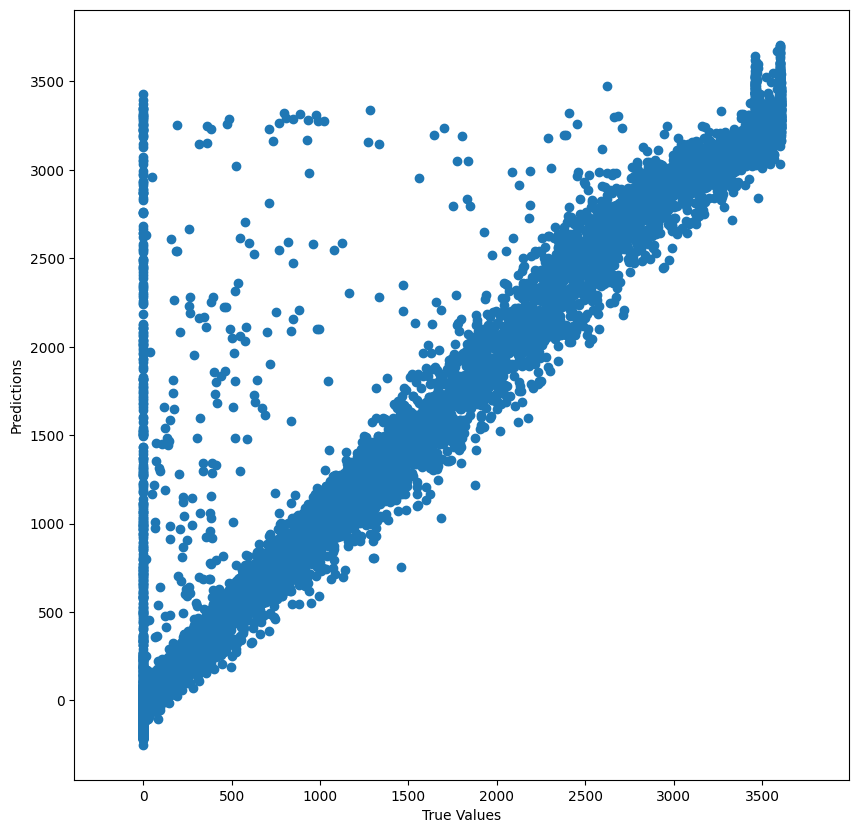

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)

#lavel axes
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

#### **Step #7: Evaluate the model's performance**

Specifically,

1. Use $\text{R}^2$, $\text{MSE}$, and $\text{MAE}$ to evaluate this model.

2. Visualize and interpret the residuals.

##### **1. Use $\text{R}^2$, $\text{MSE}$, and $\text{MAE}$ to evaluate this model.**

In [ ]:
# COMPLETE THIS CODE
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(r2, mse, mae)

0.9027026757694934 164050.80915217323 183.92638412159442


##### **2. Visualize and interpret the residuals.**

Plot the residuals for each test point and confirm that they are randomly distributed around 0.

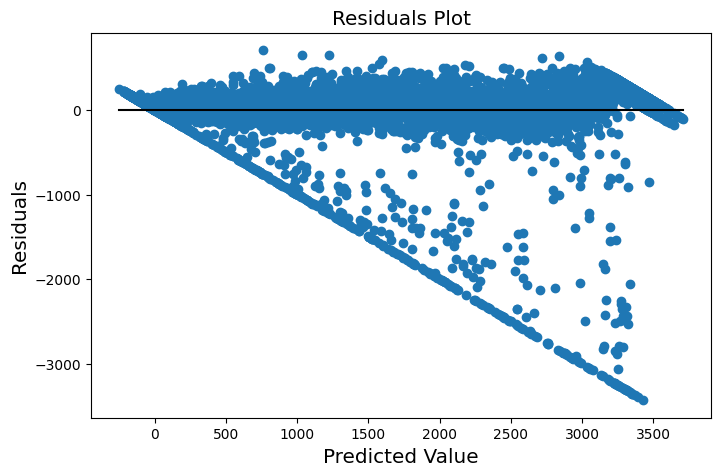

In [ ]:
residuals = y_test-predictions
plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

#### **Step #8: Use the model**

Specifically,

1. Predict the power output for the three three provided data points.

2. Compare these values to the minimum, average, and maximum outputs.

3. Visualize the modeled relationship between `LV ActivePower (kW)` and each of the three features used to see if a qualitative relationship can be inferred.

4. Look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the power output for the following data points:**

* **Data Point 1: The Minimum** - Each feature for this data point should be the minimum possible value found in the dataset.
* **Data Point 2: The Average** - Each feature for this data point should be the average value found in the dataset.
* **Data Point 3: The Maximum** - Each feature for this data point should be the maximum value found int he dataset.

<br>

**NOTE**: There are several ways to accomplish this, with the easiest relying on pandas methods.

In [ ]:
wind_speed_data = df_cleaned[wind_speed_variable]
wind_dir_data = df_cleaned[wind_dir_variable]
theoretical_power_data = df_cleaned[theoretical_power_variable]

data = [[wind_speed_data.min(), wind_dir_data.min(), theoretical_power_data.min()],[wind_speed_data.mean(), wind_dir_data.mean(), theoretical_power_data.mean()],[wind_speed_data.max(), wind_dir_data.max(), theoretical_power_data.max()]]

new_data = pd.DataFrame(data, columns = X_test.columns)

print(model_1.predict(new_data))

[-250.05836979 1310.25721078 3848.09436143]


##### **2. Compare these values to the minimum, average, and maximum outputs.**

Find the minimum, average, and maximum for `LV ActivePower (kW)` and compare to the predicted values above.

<br>

**NOTE**: These are not exactly the actual values we should expect for the data points above, but they are a good way to *loosely* check our model in this case.

In [ ]:
y.describe()

count    50473.000000
mean      1309.161489
std       1312.463427
min          0.000000
25%         52.740540
50%        828.006714
75%       2484.364014
max       3618.732910
Name: LV ActivePower (kW), dtype: float64

##### **3. Visualize the modeled relationship between `LV ActivePower (kW)` and each of the three features used to see if a qualitative relationship can be inferred.**

Specifically, plot the predicted and actual values in the test set against each feature.

<br>

**NOTE**: Make sure to include proper axis labels, a title, and a legend.

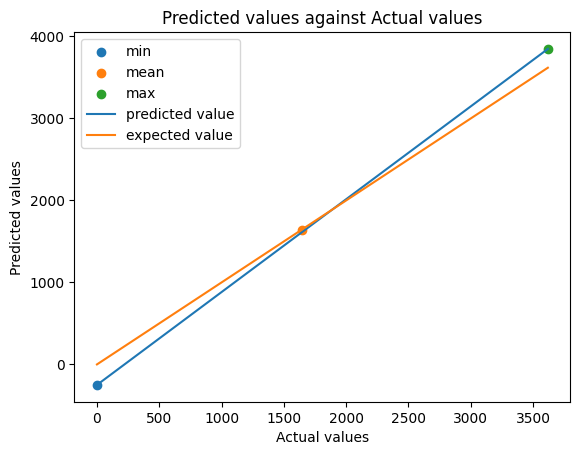

In [ ]:
y_data = model_1.predict(new_data)
x_data = y.describe()[["min", "mean", "max"]]

#place data points
plt.scatter(x_data.min(), y_data.min())
plt.scatter(x_data.mean(), y_data.mean())
plt.scatter(x_data.max(), y_data.max())

#label axes
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted values against Actual values")

#draw expected value line
plt.plot([x_data.min(),x_data.max()],[y_data.min(),y_data.max()])
plt.plot([0,x_data.max()], [0,x_data.max()])
#draw prediction line
#label points
plt.legend(["min", "mean", "max", "predicted value", "expected value"])
plt.show()

##### **4. Complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.coef_
intercept = model_1.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ['LV ActivePower (kW)'])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,44.805214,0.407306,0.783934


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,LV ActivePower (kW)
0,-250.05837


<a name="p2.2"></a>

---
### **[OPTIONAL] Part 2.2: Attempting to Improve the Model**
---

In this challenging, optional section, you can work through several ways to *attempt* improving the model by considering the nature of this particular dataset.

#### **Problem #2.2.1**

Let's start by addressing what we observed in Problem #1.2.10. Specifically,
1. Drop any data points where `LV ActivePower (kW)` is 0 or `Theoretical_Power_Curve (KWh)` is at its maximum from the features and labels used for modeling.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Select only valid data points
power_df = power_df[power_df['LV ActivePower (kW)'] != 0]
power_df = power_df[power_df['Theoretical_Power_Curve (KWh)'] != power_df['Theoretical_Power_Curve (KWh)'].max()]

# Steps #2 - 7
x = # COMPLETE THIS CODE
y = # COMPLETE THIS CODE

X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS CODE

model_2 = # COMPLETE THIS CODE
model_2.fit(# COMPLETE THIS CODE
predictions = # COMPLETE THIS CODE

print("R2: " + str(# COMPLETE THIS CODE
print("MSE: " + str(# COMPLETE THIS CODE
print("MAE: " + str(# COMPLETE THIS CODE

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

In [ ]:
# Visualize residuals on the test set

# COMPLETE THIS CODE

#### **Problem #2.2.2**

You should have seen an improvement in the results, but still noticed a few items of concern. In particular, notice that the residuals plot is *almost* equally distributed around 0 *except* points that form a nearly straight line changing with predicted value. This was present before, but the fixes in Problem #2.2.1 did not seem to completely address this "oddity".

<br>

This is likely due to the role that *time* plays in our data. This creates complex, correlated relationships between data points meaning that the order of data matters--something that very few models are built to handle. This kind of data, known formally as [time series data](https://en.wikipedia.org/wiki/Time_series), actually requires much deeper and specific statistical tools than what we will explore in this course. However, we can try several different ways of dealing with time.


Let's start by simply including time as a feature so that perhaps our model can learn about it. Specifically,

1. In the modified DataFrame from above, create a new feature called `Time (min)` that equals `power_df.index` times 10.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Create the Time (min) feature and perform Steps #2 - 7
power_df['Time (min)'] = # COMPLETE THIS CODE

# COMPLETE THIS CODE

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

In [ ]:
# Visualize residuals on the test set

# COMPLETE THIS CODE

#### **Problem #2.2.3**

You likely noticed very little difference in the results. Simply including time as a feature is not enough. One aspect of more sophisticated approaches is to predict the *difference* between points instead of the values of the points themselves. This is commonly known as [integration](https://en.wikipedia.org/wiki/Order_of_integration), [lag, or backshift](https://en.wikipedia.org/wiki/Lag_operator).

While the theory behind this can get complex, we can implement it quite simply using the [`.shift(...)` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) built into DataFrames that shifts data by a given number of rows.

<br>

Let's use the `.shift(...)` method to predict the difference in data points. Specifically,

1. Instead of `x` and `y`, prepare the variables `x_diffs` and `y_diffs` as our data for modeling such that they represent a shift of 1 row in the `x` and `y` data *without the `Time (min)` variable*.

2. Perform Steps #2 - 7 with a linear regression model for these modified features and labels, including the visualizations of the model's predictions and residuals.

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7
x = # COMPLETE THIS CODE
x_diffs = x - x.shift(1)
x_diffs = x_diffs.dropna(how='any')

y = # COMPLETE THIS CODE
y_diffs = # COMPLETE THIS CODE
y_diffs = # COMPLETE THIS CODE

# COMPLETE THIS CODE

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

In [ ]:
# Visualize residuals on the test set

# COMPLETE THIS CODE

#### **Problem #2.2.4**

You should have seen interesting results where the $\text{R}^2$ went down (around 0.72), but all other measures of model performance improved. However, an $\text{R}^2 > 0.7$ is still considered good in practice, particularly given the other markers of success and the many layers of consideration that have been included in our model.

From here, it is a matter of adjusting the exact shift we use and eventually moving onto even more advanced methods such as [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average).

<br>

In the space below, explore how changing the amount of shift impacts the model's performance.

In [ ]:
# Create the shifted dataset and perform Steps #2 - 7

# COMPLETE THIS CODE

In [ ]:
# Visualize comparison of predictions vs. actual values

# COMPLETE THIS CODE

In [ ]:
# Visualize residuals on the test set

# COMPLETE THIS CODE

---
#End of Notebook

© 2023 The Coding School, All rights reserved